## Boston Houses Dataset

### Section 2 - Loading boston housing dataset and Exploratory Analysis

In [8]:
import pandas as pd
from sklearn.datasets import load_boston

In [23]:
boston = load_boston()
X = boston.data
y = boston.target

/home/raghav/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing d

In [24]:
print(X.shape)
print(y.shape)

(506, 13)
(506,)


In [25]:
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [26]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [27]:
type(X)

numpy.ndarray

In [28]:
df = pd.DataFrame(X)

In [29]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [30]:
df.columns = boston.feature_names
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [31]:
## Normalize the dataset
# Each feature must have 0 mean and unit variance
#axis = 0 means that it will find mean accros all rows for 13 features 
import numpy as np
u = np.mean(X,axis=0)
std = np.std(X,axis=0)
print(u.shape,std.shape)

(13,) (13,)


In [32]:
# Normalize the data 
X = (X-u)/std

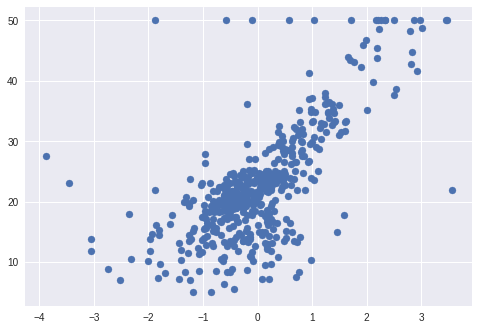

In [33]:
# Plot Y vs any features 
import matplotlib.pyplot as plt
plt.style.use('seaborn')
plt.scatter(X[:,5],y)

### Section 2 - Linear Regression on Multiple Features
- Boston Housing Dataset

In [34]:
X.shape, y.shape

((506, 13), (506,))

- Xij means x value at ith row and jth feature 
- also, we will add one feature Xi0 (dummy feature) such that we can take dot product between thetaT and X

In [36]:
ones = np.ones((X.shape[0],1))
X = np.hstack((ones,X))
print(X.shape)
#now we have added a dummy column with value 1 in each row

(506, 14)


In [38]:
# X - Matrix(m x n)
# x - Vector (Single Example with n features)

def hypothesis(x,theta):
    y_ = 0.0
    n = x.shape[0]
    for i in range(n):
        y_ += (theta[i]*x[i])
    return y_

def error(X,y,theta):
    e = 0.0
    m = X.shape[0]
    for i in range(m):
        y_ = hypothesis(X[i],theta)
        e += (y[i]-y_)**2
    return e/m

def gradient(X,y,theta):
    m,n = X.shape
    grad = np.zeros((n,))

    #for all values of j
    for j in range(n):
        #sum over all examples
        for i in range(m):
            y_ = hypothesis(X[i],theta)
            grad[j] += (y_ - y[i])*X[i][j]
    return grad/m

def gradient_descent(X,y,lr = 0.1,max_epochs=300):
    m,n = X.shape
    theta = np.zeros((n,))
    error_list = []
    for i in range(max_epochs):
        e = error(X,y,theta)
        error_list.append(e)

        #Gradient Descent 
        grad = gradient(X,y,theta)
        for j in range(n):
            theta[j] = theta[j] - lr*grad[j]
    return theta,error_list


    

In [48]:
import time
start = time.time()
theta,error_list = gradient_descent(X,y)
end = time.time()
print(f"Time taken {end-start}")

Time taken 11.60894250869751


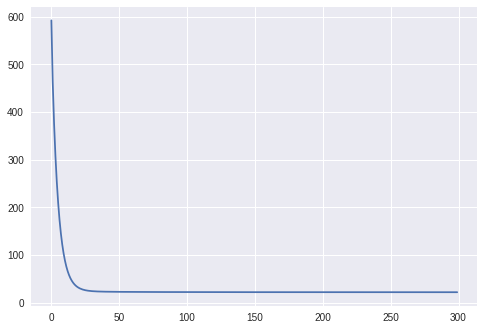

In [41]:
plt.plot(error_list)
plt.show()

### Predictions

In [44]:
y_ = []
m = X.shape[0]
for i in range(m):
    pred = hypothesis(X[i],theta)
    y_.append(pred)
y_ = np.array(y_)

In [45]:
def r2_score(Y,Y_):
    #broadcasting will happen here
    num = np.sum((Y-Y_)**2)
    denom = np.sum((Y - Y.mean())**2)
    score = (1 - num/denom)
    return score*100

In [46]:
r2_score(y,y_)

74.04541323942743

In [49]:
print(f"Time taken {end-start}")

Time taken 11.60894250869751


### Time taken to train is 11 seconds! That too for just 506 train size
- Therefore we will do another efficient implementation using Vectorization
    - Avoid loops in the implementation, except gradient descent main loop
    - Use numpy functions like np.sum(), np.dot() which are quite fast and already optimized

In [56]:
def hypothesis2(x,theta):
    return np.dot(X,theta)

def error2(X,y,theta):
    m = X.shape[0]
    y_ = hypothesis2(X,theta)
    e = np.sum((y-y_)**2)
    return e/m

def gradient2(X,y,theta):
    y_ = hypothesis2(X,theta)
    grad = np.dot(X.T,(y_ - y))
    m = X.shape[0]
    return grad/m

def gradient_descent2(X,y,lr = 0.1,max_iters=300):
    n = X.shape[1]
    theta = np.zeros((n,))
    error_list = []
    for i in range(max_iters):
        e = error2(X,y,theta)
        error_list.append(e)

        #Gradient Descent
        grad = gradient2(X,y,theta)
        theta = theta - lr*grad

    return theta,error_list

In [62]:
start = time.time()
theta,error_list = gradient_descent2(X,y)
end = time.time()
print(f"Training time = {end-start}")

Training time = 0.025570154190063477


## Now this implementation is really fast!!!

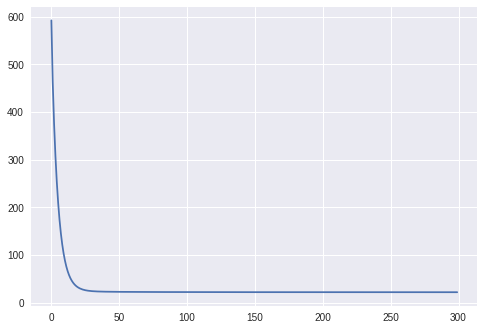

In [60]:
plt.plot(error_list)
plt.show()

In [58]:
y_ = hypothesis2(X,theta)
r2_score(y,y_)

74.04541323942742